In [1]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
from docplex.mp.model import Model
import random


In [2]:
USE_IBM_QUANTUM = True

N = 5
M = 12
W = [random.randint(5,30) for _ in range(M)]


print(W)

[19, 19, 11, 9, 8, 15, 6, 10, 11, 7, 12, 28]


In [3]:
mdl = Model()

In [4]:
decision = mdl.binary_var_matrix(N, M, name="x")

In [5]:
i = 0 
k = 10000
lst = []
# for i in range(N):
#     for j in range(i+1, N):
#         lst.append(mdl.sum_squares(
#             mdl.sum(decision[i,l]*W[l] for l in range(M))-mdl.sum(decision[j,l_2]*W[l_2] for l_2 in range(M))
#         ))
        
main_obj = mdl.sum_squares(
                mdl.sum(decision[i,l]*W[l] for l in range(M))
                -
                mdl.sum(decision[j,l_2]*W[l_2] for l_2 in range(M))
            for j in range(i+1, N) for i in range(N)
            )
# main_obj = mdl.sum(x for x in lst)
i = 0
st_kara = k*mdl.sum(decision[i,j]*decision[l,j] for l in range(i+1,N) for i in range(N-1) for j in range(M))
nd_kara = k*mdl.sum(N-mdl.sum(decision[i,j] for i in range(N)) for j in range(M))
final = mdl.minimize(main_obj+st_kara+nd_kara)


In [6]:
# print(mdl.export_as_lp_string())

In [7]:
# sol = mdl.solve(log_output=True)

# TUTAJ ZACZYNA SIĘ CZĘŚĆ KWANTOWA

In [8]:
mod = from_docplex_mp(mdl)
print(type(mod))
print()
print(mod.prettyprint())

<class 'qiskit_optimization.problems.quadratic_program.QuadraticProgram'>

Problem name: docplex_model1

Minimize
  1444*x_0_0^2 + 2888*x_0_0*x_0_1 + 1824*x_0_0*x_0_10 + 4256*x_0_0*x_0_11
  + 1672*x_0_0*x_0_2 + 1368*x_0_0*x_0_3 + 1216*x_0_0*x_0_4 + 2280*x_0_0*x_0_5
  + 912*x_0_0*x_0_6 + 1520*x_0_0*x_0_7 + 1672*x_0_0*x_0_8 + 1064*x_0_0*x_0_9
  + 9278*x_0_0*x_1_0 - 722*x_0_0*x_1_1 - 456*x_0_0*x_1_10 - 1064*x_0_0*x_1_11
  - 418*x_0_0*x_1_2 - 342*x_0_0*x_1_3 - 304*x_0_0*x_1_4 - 570*x_0_0*x_1_5
  - 228*x_0_0*x_1_6 - 380*x_0_0*x_1_7 - 418*x_0_0*x_1_8 - 266*x_0_0*x_1_9
  + 9278*x_0_0*x_2_0 - 722*x_0_0*x_2_1 - 456*x_0_0*x_2_10 - 1064*x_0_0*x_2_11
  - 418*x_0_0*x_2_2 - 342*x_0_0*x_2_3 - 304*x_0_0*x_2_4 - 570*x_0_0*x_2_5
  - 228*x_0_0*x_2_6 - 380*x_0_0*x_2_7 - 418*x_0_0*x_2_8 - 266*x_0_0*x_2_9
  + 9278*x_0_0*x_3_0 - 722*x_0_0*x_3_1 - 456*x_0_0*x_3_10 - 1064*x_0_0*x_3_11
  - 418*x_0_0*x_3_2 - 342*x_0_0*x_3_3 - 304*x_0_0*x_3_4 - 570*x_0_0*x_3_5
  - 228*x_0_0*x_3_6 - 380*x_0_0*x_3_7 - 418*x_0_0*x_3

In [9]:
op, offset = mod.to_ising()
test = mod.to_ising()
print("offset: {}".format(offset))
print("operator:")
print(op)

offset: 889576.0
operator:
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'

In [10]:
# General imports
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

# Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# SciPy minimizer routine
from scipy.optimize import minimize

# rustworkx graph library
import rustworkx as rx
from rustworkx.visualization import mpl_draw

In [11]:
# runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# To run on hardware, select the backend with the fewest number of jobs in the queue
#service = QiskitRuntimeService(channel="ibm_quantum")
#backend = service.least_busy(operational=True, simulator=False)

# backend.name

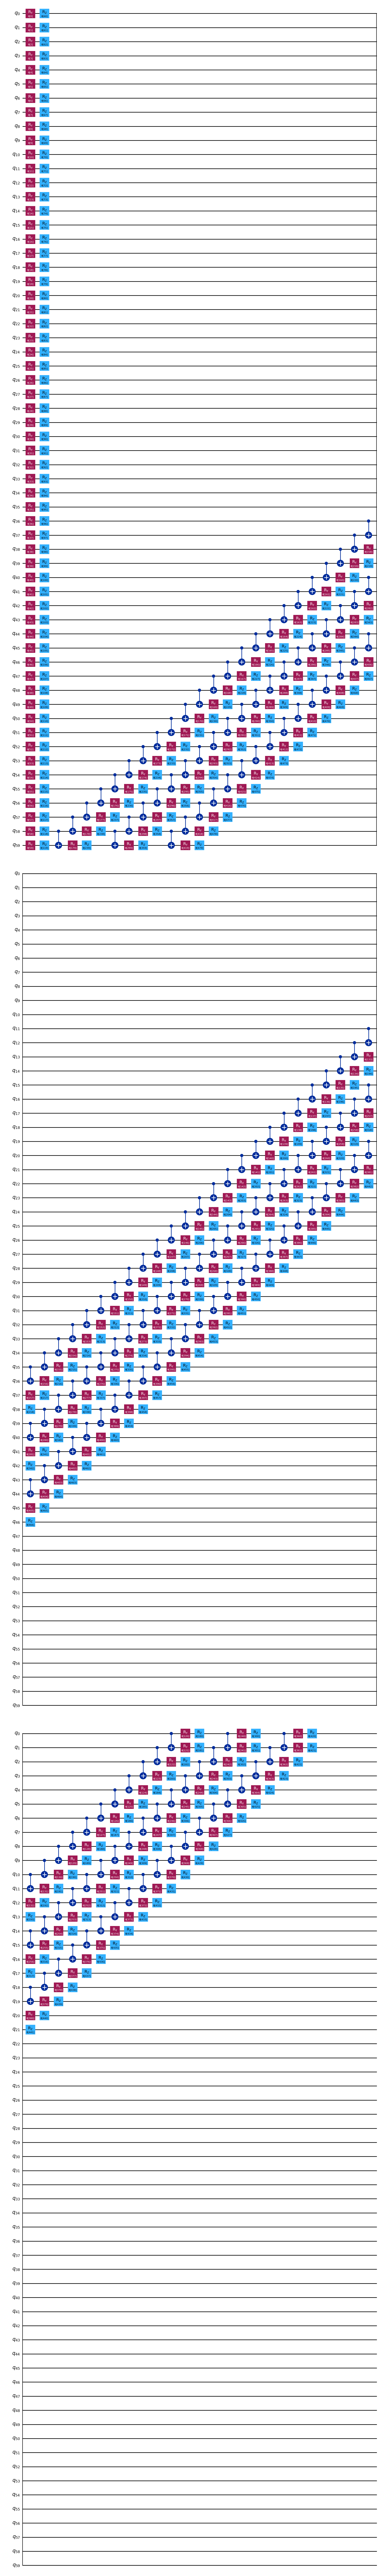

In [12]:
ansatz = EfficientSU2(op.num_qubits)
ansatz.decompose().draw("mpl", style="iqp")

In [18]:
num_params = ansatz.num_parameters
num_params

480

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    cost = result[0].data.evs[0]

    return cost

In [ ]:
#session = Session(backend=backend)

# Configure estimator
# estimator = Estimator(session=session)
estimator = Estimator()
estimator.options.default_shots = 10_000
estimator.options.dynamical_decoupling.enable = True

# Configure sampler
# sampler = Sampler(session=session)
sampler = Sampler()
sampler.options.default_shots = 10_000
sampler.options.dynamical_decoupling.enable = True